<a href="https://colab.research.google.com/github/isaacbilsel/GNN-Proteins/blob/main/Test1BigDataProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchdata
!pip install --upgrade torch torchvision torchaudio
!pip install dgl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
!pip uninstall torch torchdata dgl -y
!pip install torch==2.1.0 torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install torchdata==0.6.1
!pip install dgl==1.1.1

Found existing installation: torch 2.6.0
Uninstalling torch-2.6.0:
  Successfully uninstalled torch-2.6.0
Found existing installation: torchdata 0.11.0
Uninstalling torchdata-0.11.0:
  Successfully uninstalled torchdata-0.11.0
Found existing installation: dgl 2.1.0
Uninstalling dgl-2.1.0:
  Successfully uninstalled dgl-2.1.0
Looking in indexes: https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.9/184.9 MB 6.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.6 MB/s eta

In [ ]:
import torchdata
print(torchdata.__version__)

0.6.1


In [ ]:
import dgl
from dgl.data import PPIDataset
import torch
from sklearn.preprocessing import StandardScaler
# Load the dataset (train, validation, and test)
train_dataset = PPIDataset(mode='train')
val_dataset = PPIDataset(mode='valid')
test_dataset = PPIDataset(mode='test')

# Extract graph and labels
train_graphs = [g for g in train_dataset]
val_graphs = [g for g in val_dataset]
test_graphs = [g for g in test_dataset]

num_train_graphs = len(train_graphs)
num_val_graphs = len(val_graphs)
num_test_graphs = len(test_graphs)

feat_size = train_graphs[0].ndata['feat'].shape[1]
num_labels = train_graphs[0].ndata['label'].shape[1]

print(num_train_graphs, num_val_graphs, num_test_graphs, feat_size, num_labels)


# Function to normalize node features using StandardScaler (Z-score normalization)
def normalize_node_features(graphs):
    all_feats = torch.cat([g.ndata['feat'] for g in graphs], dim=0).numpy()
    scaler = StandardScaler()
    scaler.fit(all_feats)
    for g in graphs:
        g.ndata['feat'] = torch.tensor(scaler.transform(g.ndata['feat'].numpy()), dtype=torch.float32)

normalize_node_features(train_graphs)
normalize_node_features(val_graphs)
normalize_node_features(test_graphs)

feat_mean = train_graphs[0].ndata['feat'].mean(dim=0)
feat_std = train_graphs[0].ndata['feat'].std(dim=0)

print("Mean of first graph's features:", feat_mean[:5])  # Print first 5 feature means
print("Std of first graph's features:", feat_std[:5])  # Print first 5 feature std devs


DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
Extracting file to /root/.dgl/ppi_4b14ad03


/usr/local/lib/python3.11/dist-packages/networkx/readwrite/json_graph/node_link.py:287: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


20 2 2 50 121
Mean of first graph's features: tensor([ 0.0478,  0.0020,  0.0092, -0.0228, -0.0097])
Std of first graph's features: tensor([1.2464, 1.0113, 1.0397, 0.9335, 0.9350])


Low F1-score, need to tune hyper parameters as well as create a deeper model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import dgl
from dgl.nn import SAGEConv
from sklearn.metrics import f1_score

# Define GraphSAGE Model
class GraphSAGE(nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_feats, hidden_feats, 'mean')
        self.conv2 = SAGEConv(hidden_feats, out_feats, 'mean')
        self.activation = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, graph, features):
        x = self.conv1(graph, features)
        x = self.activation(x)
        x = self.dropout(x)
        x = self.conv2(graph, x)
        return torch.sigmoid(x)  # Sigmoid for multi-label classification


train_dataset = dgl.data.PPIDataset(mode='train')
val_dataset = dgl.data.PPIDataset(mode='valid')
test_dataset = dgl.data.PPIDataset(mode='test')

# Convert dataset into DGL graphs
train_graph = dgl.batch(train_dataset)
val_graph = dgl.batch(val_dataset)
test_graph = dgl.batch(test_dataset)

train_features = train_graph.ndata['feat']
train_labels = train_graph.ndata['label']
val_features = val_graph.ndata['feat']
val_labels = val_graph.ndata['label']
test_features = test_graph.ndata['feat']
test_labels = test_graph.ndata['label']

# Create the model
in_feats = train_features.shape[1]
hidden_feats = 256
out_feats = train_labels.shape[1]  # Number of labels

model = GraphSAGE(in_feats, hidden_feats, out_feats)

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
loss_fn = nn.BCELoss()  # Binary Cross-Entropy for multi-label classification

# Training function
def train_model(model, graph, features, labels, epochs=100):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        logits = model(graph, features)
        loss = loss_fn(logits, labels)
        loss.backward()
        optimizer.step()

        # Compute F1-score on training data
        preds = (logits > 0.5).float()  # Convert to binary predictions
        f1 = f1_score(labels.cpu().numpy(), preds.cpu().numpy(), average="micro")

        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, F1-score: {f1:.4f}")

# Train the model
train_model(model, train_graph, train_features, train_labels)


Epoch 1/100, Loss: 0.8810, F1-score: 0.3912
Epoch 2/100, Loss: 0.7011, F1-score: 0.4063
Epoch 3/100, Loss: 0.6745, F1-score: 0.4126
Epoch 4/100, Loss: 0.6571, F1-score: 0.4188
Epoch 5/100, Loss: 0.6363, F1-score: 0.4201
Epoch 6/100, Loss: 0.6135, F1-score: 0.4175
Epoch 7/100, Loss: 0.5938, F1-score: 0.4130
Epoch 8/100, Loss: 0.5796, F1-score: 0.4107
Epoch 9/100, Loss: 0.5704, F1-score: 0.4111
Epoch 10/100, Loss: 0.5650, F1-score: 0.4116
Epoch 11/100, Loss: 0.5610, F1-score: 0.4127
Epoch 12/100, Loss: 0.5571, F1-score: 0.4134
Epoch 13/100, Loss: 0.5533, F1-score: 0.4139
Epoch 14/100, Loss: 0.5498, F1-score: 0.4142
Epoch 15/100, Loss: 0.5466, F1-score: 0.4151
Epoch 16/100, Loss: 0.5439, F1-score: 0.4168
Epoch 17/100, Loss: 0.5419, F1-score: 0.4190
Epoch 18/100, Loss: 0.5403, F1-score: 0.4219
Epoch 19/100, Loss: 0.5384, F1-score: 0.4252
Epoch 20/100, Loss: 0.5368, F1-score: 0.4291
Epoch 21/100, Loss: 0.5356, F1-score: 0.4323
Epoch 22/100, Loss: 0.5347, F1-score: 0.4346
Epoch 23/100, Loss:

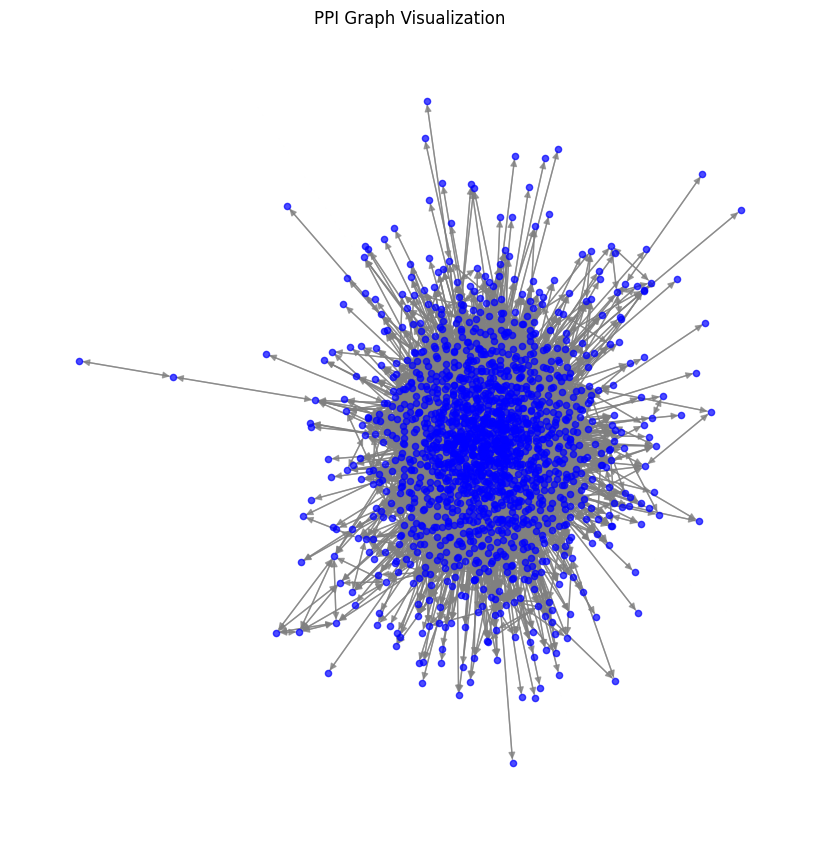

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Get the first graph from the dataset
train_dataset[4]

# Convert DGL graph to NetworkX format
nx_graph = train_dataset[4].to_networkx()

# Remove self edges
nx_graph.remove_edges_from(nx.selfloop_edges(nx_graph))

# Plot the graph
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(nx_graph)  # Layout for better visualization
nx.draw(nx_graph, pos, node_size=20, node_color="blue", edge_color="gray", alpha=0.7)

plt.title("PPI Graph Visualization")
plt.show()

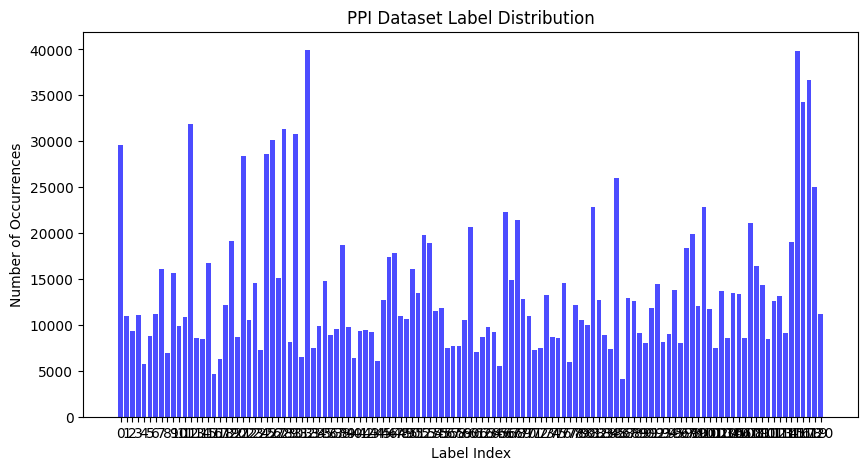

In [ ]:
# Collect labels from all graphs in the dataset
all_labels = torch.cat([g.ndata['label'] for g in train_dataset], dim=0)

# Sum across all nodes to get label counts
label_counts = all_labels.sum(dim=0).numpy()

# Plot label distribution
plt.figure(figsize=(10, 5))
plt.bar(range(len(label_counts)), label_counts, color="blue", alpha=0.7)
plt.xlabel("Label Index")
plt.ylabel("Number of Occurrences")
plt.title("PPI Dataset Label Distribution")
plt.xticks(range(len(label_counts)))  # Show all label indices
plt.show()

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def plot_label_distribution(graphs, title):
    # Concatenate all node labels from all graphs
    all_labels = torch.cat([g.ndata['label'] for g in graphs], dim=0)

    # Sum across all samples to get label frequency
    label_counts = all_labels.sum(dim=0).numpy()

    # Create bar plot
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(label_counts)), label_counts, color='royalblue')
    plt.xlabel("Label Index")
    plt.ylabel("Frequency")
    plt.title(f"Label Distribution - {title}")
    plt.show()

# Plot label distributions for train, validation, and test datasets
plot_label_distribution(train_graphs, "Train Set")
plot_label_distribution(val_graphs, "Validation Set")
plot_label_distribution(test_graphs, "Test Set")


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import dgl
from dgl.nn import SAGEConv
from sklearn.metrics import f1_score

# Load PPI dataset
train_dataset = dgl.data.PPIDataset(mode='train')
val_dataset = dgl.data.PPIDataset(mode='valid')
test_dataset = dgl.data.PPIDataset(mode='test')

# Convert dataset into batched DGL graphs
train_graph = dgl.batch(train_dataset)
val_graph = dgl.batch(val_dataset)
test_graph = dgl.batch(test_dataset)

train_features = train_graph.ndata['feat']
train_labels = train_graph.ndata['label']
val_features = val_graph.ndata['feat']
val_labels = val_graph.ndata['label']
test_features = test_graph.ndata['feat']
test_labels = test_graph.ndata['label']

# Normalize node features (Z-score normalization)
def normalize_features(features):
    mean = features.mean(dim=0, keepdim=True)
    std = features.std(dim=0, keepdim=True)
    return (features - mean) / (std + 1e-6)  # Avoid division by zero

train_features = normalize_features(train_features)
val_features = normalize_features(val_features)
test_features = normalize_features(test_features)

# Compute class weights for weighted BCE loss
def compute_class_weights(labels):
    label_counts = labels.sum(dim=0)  # Count occurrences of each label
    total_samples = labels.shape[0]
    weights = total_samples / (label_counts + 1e-6)  # Avoid division by zero
    return weights

train_weights = compute_class_weights(train_labels)

# Define GraphSAGE Model
class GraphSAGE(nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_feats, hidden_feats, 'mean')
        self.conv2 = SAGEConv(hidden_feats, out_feats, 'mean')
        self.activation = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, graph, features):
        x = self.conv1(graph, features)
        x = self.activation(x)
        x = self.dropout(x)
        x = self.conv2(graph, x)
        return torch.sigmoid(x)  # Sigmoid for multi-label classification

# Model setup
in_feats = train_features.shape[1]
hidden_feats = 256
out_feats = train_labels.shape[1]  # Number of labels

model = GraphSAGE(in_feats, hidden_feats, out_feats)

# Define optimizer, loss function, and learning rate scheduler
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
loss_fn = nn.BCELoss(weight=train_weights)  # Weighted BCE loss
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

# Validation function
def evaluate_model(model, graph, features, labels):
    model.eval()
    with torch.no_grad():
        logits = model(graph, features)
        loss = loss_fn(logits, labels)
        preds = (logits > 0.5).float()
        f1 = f1_score(labels.cpu().numpy(), preds.cpu().numpy(), average="micro")
    return loss.item(), f1

# Training function with validation and checkpointing
def train_model(model, train_graph, train_features, train_labels, val_graph, val_features, val_labels, epochs=100):
    best_val_f1 = 0.0

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        logits = model(train_graph, train_features)
        loss = loss_fn(logits, train_labels)
        loss.backward()
        optimizer.step()

        # Compute training F1-score
        preds = (logits > 0.5).float()
        train_f1 = f1_score(train_labels.cpu().numpy(), preds.cpu().numpy(), average="micro")

        # Validate model
        val_loss, val_f1 = evaluate_model(model, val_graph, val_features, val_labels)

        # Learning rate scheduling
        scheduler.step(val_loss)

        # Save best model
        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            torch.save(model.state_dict(), "best_graphsage_model.pth")

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Train F1: {train_f1:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val F1: {val_f1:.4f}")

# Train with validation set
train_model(model, train_graph, train_features, train_labels, val_graph, val_features, val_labels)

# Load best model before testing
model.load_state_dict(torch.load("best_graphsage_model.pth"))

# Evaluate on test set
test_loss, test_f1 = evaluate_model(model, test_graph, test_features, test_labels)
print(f"Test Loss: {test_loss:.4f}, Test F1-score: {test_f1:.4f}")


Epoch 1/100, Train Loss: 3.8954, Train F1: 0.4012, Val Loss: 2.4792, Val F1: 0.3893
Epoch 2/100, Train Loss: 2.7873, Train F1: 0.3929, Val Loss: 2.4283, Val F1: 0.4097
Epoch 3/100, Train Loss: 2.6529, Train F1: 0.4071, Val Loss: 2.4620, Val F1: 0.4275
Epoch 4/100, Train Loss: 2.6528, Train F1: 0.4191, Val Loss: 2.4147, Val F1: 0.4273
Epoch 5/100, Train Loss: 2.5889, Train F1: 0.4213, Val Loss: 2.3271, Val F1: 0.4202
Epoch 6/100, Train Loss: 2.4830, Train F1: 0.4189, Val Loss: 2.2425, Val F1: 0.4126
Epoch 7/100, Train Loss: 2.3806, Train F1: 0.4145, Val Loss: 2.1786, Val F1: 0.4079
Epoch 8/100, Train Loss: 2.3003, Train F1: 0.4122, Val Loss: 2.1373, Val F1: 0.4052
Epoch 9/100, Train Loss: 2.2416, Train F1: 0.4117, Val Loss: 2.1136, Val F1: 0.4043
Epoch 10/100, Train Loss: 2.2046, Train F1: 0.4127, Val Loss: 2.1004, Val F1: 0.4060
Epoch 11/100, Train Loss: 2.1788, Train F1: 0.4142, Val Loss: 2.0910, Val F1: 0.4096
Epoch 12/100, Train Loss: 2.1606, Train F1: 0.4161, Val Loss: 2.0809, Val 

Node Index: 3639
Actual Labels (1 = Present): [  0   2   8   9  10  12  15  19  21  22  23  25  26  27  28  30  32  37
  38  39  41  45  46  47  50  53  55  58  59  63  66  73  76  78  79  80
  82  84  85  88  89  91  92  94  95  97  98 100 107 112 114 115 116 117
 118 119 120]
Predicted Labels (1 = Predicted): [  6  12  19  21  25  27  28  30  32  47  50  52  66  81  82  85  91  98
 115 116 117 118 119]
Correct Predictions: [  1   3   4   5   7  11  12  13  14  16  17  18  19  20  21  24  25  27
  28  29  30  31  32  33  34  35  36  40  42  43  44  47  48  49  50  51
  54  56  57  60  61  62  64  65  66  67  68  69  70  71  72  74  75  77
  82  83  85  86  87  90  91  93  96  98  99 101 102 103 104 105 106 108
 109 110 111 113 115 116 117 118 119]
Incorrect Predictions: [  0   2   6   8   9  10  15  22  23  26  37  38  39  41  45  46  52  53
  55  58  59  63  73  76  78  79  80  81  84  88  89  92  94  95  97 100
 107 112 114 120]


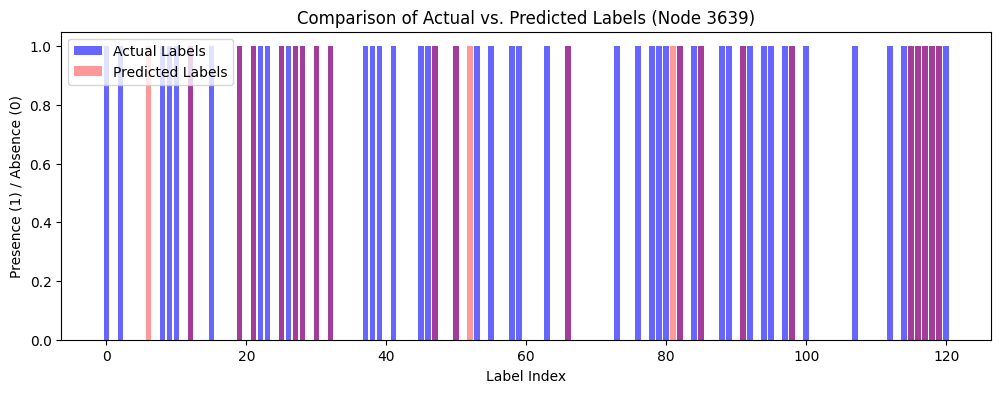

In [ ]:
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize predictions for a single test node
def test_single_node(model, graph, features, labels, node_idx=None):
    model.eval()
    with torch.no_grad():
        logits = model(graph, features)

    # Select a random node if not provided
    if node_idx is None:
        node_idx = random.randint(0, labels.shape[0] - 1)

    actual_labels = labels[node_idx].cpu().numpy()
    predicted_probs = logits[node_idx].cpu().numpy()
    predicted_labels = (predicted_probs > 0.5).astype(int)  # Convert probabilities to binary 0 or 1

    # Compare predictions with ground truth
    correct = actual_labels == predicted_labels
    incorrect = ~correct

    # Print results
    print(f"Node Index: {node_idx}")
    print(f"Actual Labels (1 = Present): {np.where(actual_labels == 1)[0]}")
    print(f"Predicted Labels (1 = Predicted): {np.where(predicted_labels == 1)[0]}")
    print(f"Correct Predictions: {np.where(correct)[0]}")
    print(f"Incorrect Predictions: {np.where(incorrect)[0]}")

    # Plot comparison
    labels_idx = np.arange(len(actual_labels))
    plt.figure(figsize=(12, 4))
    plt.bar(labels_idx, actual_labels, color="blue", alpha=0.6, label="Actual Labels")
    plt.bar(labels_idx, predicted_labels, color="red", alpha=0.4, label="Predicted Labels")
    plt.xlabel("Label Index")
    plt.ylabel("Presence (1) / Absence (0)")
    plt.title(f"Comparison of Actual vs. Predicted Labels (Node {node_idx})")
    plt.legend()
    plt.show()

# Run the test for a random node
test_single_node(model, test_graph, test_features, test_labels)
